<a href="https://colab.research.google.com/github/israelalex2323-perez/IA-013-PEREZ-REMIGIO-ISRAEL-ALEXANDER-2007050/blob/main/ACTIVIDADES/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INTELIGENCIA ARTIFICIAL 013 N4 - N6
#AF5 PROCESAMIENTO DE CONJUNTOS DE DATOS DE PYTHON
#INTEGRANTES___________________ MATRICULA ____ CARRERA
#ISRAEL ALEXANDER PEREZ REMIGIO - 2007050 ---- IMC
#CARMEN BELÉN CONTRERAS VAZQUEZ - 2173848 ---- IMC
#GERSON MOISÉS PUENTE ARREDONDO - 1823543 ----- IMC
#FÁTIMA QUETZALI RODRÍGUEZ REYNA - 1958057 ---- IMC

In [ ]:
#Comenzamos importando las librerías necesarias para esta actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Ahora importaremos el Dataset (dataset que fue importada en la misma carpeta que aloja este archivo, url obtenida desde "rawr")
url = 'https://raw.githubusercontent.com/Pandhuskyy/Inteligencia_Artificial_N4-N6_013/refs/heads/main/ACTIVIDADES/robot_sensors.csv'
df = pd.read_csv(url)
#Mostrando las primeras filas del dataset
df.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


In [ ]:
#Comenzamos con la limpieza de datos
#Primero, se eliminarán valores nulos
df_clean = df.dropna().reset_index(drop=True)
#Verificar que hayan sido eliminados
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        913 non-null    int64  
 1   Distancia (cm)    913 non-null    float64
 2   Velocidad (cm/s)  913 non-null    float64
 3   Temperatura (°C)  913 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.7 KB


In [ ]:
#Eliminando Valores Atípicos (aquellos con velocidad negativa)
df_clean = df_clean[df_clean['Velocidad (cm/s)'] >= 0]
#Verificar (Ahora se mantendrán las filas con velocidad mayor o igual a 0)
df_clean.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


In [ ]:
#Ahora normalizaremos los datos numéricos con  Min-Max Scaling
# Crear el scaler
scaler = MinMaxScaler()

# Seleccionamos las columnas numéricas para normalizar
columnas_num = ['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Ajustamos y transformamos los datos
df_clean[columnas_num] = scaler.fit_transform(df_clean[columnas_num])

# Verificar los datos normalizados
df_clean.head()


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0.000000,0.371735,0.182609,0.262269
1,0.001001,0.950755,0.540740,0.247509
2,0.002002,0.730954,0.873049,0.908233
3,0.003003,0.596960,0.731791,0.250082
4,0.004004,0.152134,0.806411,0.272535


6- Gráficas de valores vs tiempo


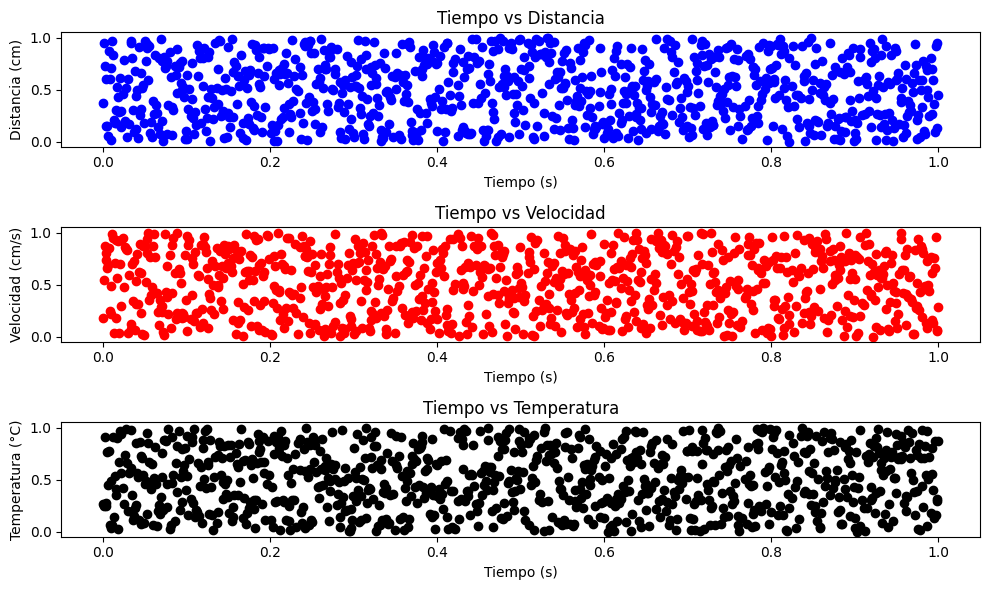

In [ ]:
#Visualizar los datos con Matplotlib, (como varían los sensores através del tiempo)
print("6- Gráficas de valores vs tiempo")

if 'Tiempo (s)' in df_clean.columns:
    plt.figure(figsize=(10, 6))

    # Tiempo vs Distancia
    plt.subplot(3, 1, 1)
    plt.scatter(df_clean['Tiempo (s)'], df_clean['Distancia (cm)'], color='blue')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Distancia (cm)')
    plt.title('Tiempo vs Distancia')

    # Tiempo vs Velocidad
    plt.subplot(3, 1, 2)
    plt.scatter(df_clean['Tiempo (s)'], df_clean['Velocidad (cm/s)'], color='red')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Velocidad (cm/s)')
    plt.title('Tiempo vs Velocidad')

    # Tiempo vs Temperatura
    plt.subplot(3, 1, 3)
    plt.scatter(df_clean['Tiempo (s)'], df_clean['Temperatura (°C)'], color='black')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Tiempo vs Temperatura')

    plt.tight_layout()
    plt.show()